# ACCY 571 Group Project  

## Overview 
-----

### Goal   

Complete a data analytics project that demonstrates your mastery of the course content.
  
  1.  Demonstrate the ability to apply machine learning and data analytics concepts from ACCY 570 to summarize data and to produce insightful visualizations.
  2.  Show that you can interact with a SQL database to extract relevant data.
  3.  Show that you can use text and network analyses to extract key insights from a rich data set.
  
### Prompt  

Your boss at Goliath National Bank sends you the frustratingly vague directive:

> We're interested in funding the development of new businesses such as 
> - restaurants,  
> - coffee shops, and  
> - bars
>  
> in the far off land of ____, but we need your team to 
> **get a better picture of the consumers** before we get make any investments.  

Your task is to pick a region or city and use the provided yelp database to characterize the eating/spending habits of of the resident consumers. Your boss hasn't specified exactly what she is expecting you to find, so it is up to you best figure out how to determine the best location.

-----

## Criteria
-----

You will work in groups of __4-5__ students to analyze the provided **Yelp** data set to make a recommendation,
based on the features present in this database.

You will complete three tasks for this group project:
1. A group report in the form of a Jupyter notebook,
2. An in-class presentation where your group will present your results, and 
3. Peer evaluation of the contributions of each member of your group.

Your final group report will be a single Jupyter notebook that will integrate Markdown, Python code, and the results from your code, such as data visualizations. Markdown cells should be used to explain any decisions you make regarding the data, to discuss any plots or visualizations generated in your notebook, and the results of your analysis. As a general guideline, the content should be written in a way that a fellow classmate (or an arbitrary data scientist/analyst) should be able to read your report and understand the results, implications, and processes that you followed to achieve your result. If printed (not that you should do this), your report should be at least fifteen pages.

Your group will present the material in-class in a format that is left up to each group. For example, you can use presentation software such as MS Powerpoint, PDFs, your Notebook, or Prezi, or, alternatively, you can choose some other presentation style (feel free to discuss your ideas with the course staff). The presentations should cover all steps in your analytics process and highlight your results. The presentation should take between eight to twelve minutes, and will be graded by your discussion teaching assistant.

### Rubric
  - Notebook Report (40%)
  - Class presentation (40%)
  - Peer assessment from your group-mates (20%)

### General

Your report should 
  1. use proper markdown, 
  2. include all of the code used for your analysis,
  3. include properly labeled plots (e.g., use axis labels and titles),
  4. use a consistent style between graphs, and
  5. be entirely the work of your own group, **Do not plagiarize code, this includes anything you might find online**.
  
All code should be written by you and your group.

-----

### Exploratory Data Analysis (EDA)

When exploring the database to determine how to pick the best location (and optionally what type of business or businesses to launch), some ideas to consider are:

- What types of restaurants are most popular and where?  
  - Can we predict the rating of different types of restaurants? 
  - How does your city compare to other major cities or nearby towns? 
  - I.e. do coffee shops fair better in Champaign than elsewhere?
- What can be learned from the review text itself? 
  - Whats the sentiment towards different types of eateries? 
  - What are reviewers talking about the most?
- Do users who visit one business tend to visit certain other businesses? 
  - I.e. do people who like seven saints tend to like _Distihl_? What about their friends?
- Is the restaurant selection diverse or homogenous? 
  - Are there a lot of a few types of restaurants? 
  - Has this been changing over time? 
  - Is there a demand for more types of food?
- How much does location matter? 
  - Are there central hubs where restaurants tend to do well in the reviews?

These questions are __NOT__ meant to be comprehensive, they are useful starting points. You should try to answer at least three major questions and at least one new question that your group comes up with on their own (i.e. not on the previous list).

-----

## Objectives

### Exposition

1. Break the overarching question **_What are consumer's eating habits?_**' into at least 3 smaller sub-questions. 
2. Explain how answering these contributes to answering the overarching question.

### Pull and Process Data

1. Use the yelp database to construct datasets to be used in your analysis.
2. Create features, preprocess, normalize, cluster, reduce dimensions, etc. as necessary.

### Analysis

For each of the questions your group decides to answer, approach them in the following manner:

1. Question 1
   1. Use graphs, machine learning, data aggregation, or anything else needed to answer the question
2. Question 2
   1. Use graphs, machine learning, data aggregation, or anything else needed to answer the question
3. Question 3
   1. Use graphs, machine learning, data aggregation, or anything else needed to answer the question
3. Question 4
   1. Use graphs, machine learning, data aggregation, or anything else needed to answer the question


-----

### Conclusion

Summarize your results, in plain english, as if this is the only part your boss will read. Note your boss is intelligent but has no interest in code or model output, she is only interested in words, pictures, and metrics.

-----

## Notes

- Completing the objectives will most likely __NOT__ proceed linearly. Querying data and subsequently analyzing these data will lead to new insights, which will mean extracting more data and performing new analyses. This entire process will also  influence the types of questions you can ask/answer.
- The overall [Database schematic][dbs] is available showing the data and their inherent relationships. This should be a starting point for your queries.
  - Note, we have not included the photo dataset, this keeps the data volume to a reasonable size.
- There is no unique solution to this project, each group should develop a different approach, analysis pipeline, and result.
- Your group should have fun with this! This is an open-ended project, which will be similar to what you face next semester in ACCY 575, and in the real world. The Yelp datasets contain a great deal of very interesting information, this is a chance for you to demonstrate to the class your mastery of the subject material, you should have fun exploring.

-----

[dbs]: https://s3-media2.fl.yelpcdn.com/assets/srv0/engineering_pages/9c5f7a89fd08/assets/img/dataset/yelp_dataset_schema.png

# Question 1   Relationship between Locations and Reviews
#### Question: 
- How much does location matter?
  - Are there central hubs where restaurants tend to do well in the reviews?

In [11]:
%matplotlib inline
import pandas as pd
import sqlite3 as sql
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt
from matplotlib import cm

## (1)Scatter Plot Visual Analysis
We choose champaign and set a range for the location we want to analysis.We first tried the scatter plot to see the relationship between the location of restaurants and reviews of it. 

In [12]:
# Example query to pull reviews for all businesses in Champaign-Urbana
query ='''select b.*,
                  c.category
           from business as b
           left join category as c
             on b.id = c.business_id
           where b.city = "Champaign" 
           '''

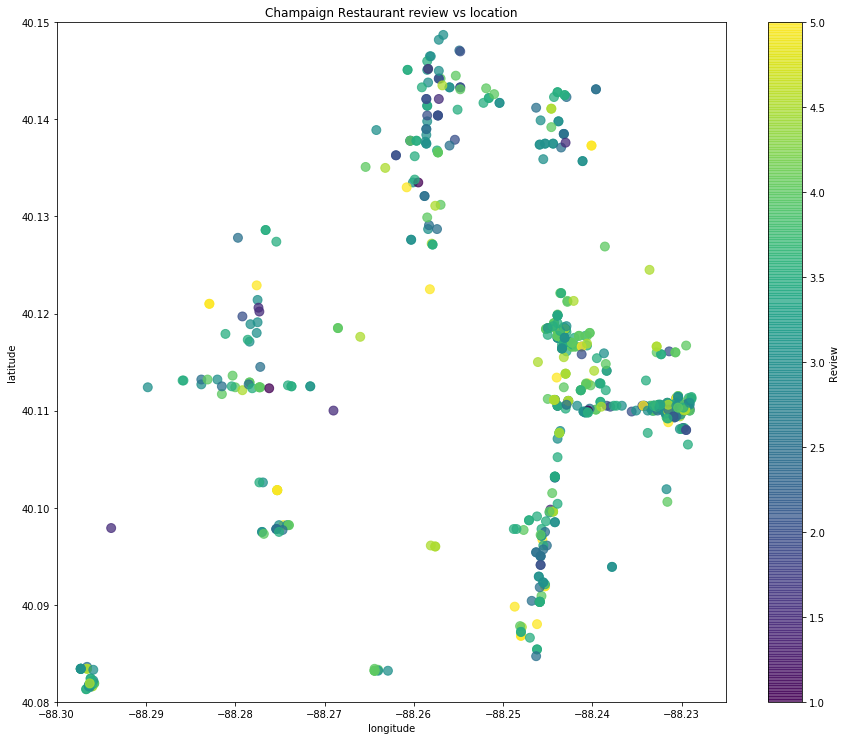

In [13]:
with sql.connect('/home/data_scientist/accy571/readonly/data/yelp.db') as con:
        df = pd.read_sql(query, con)
        #display(df)
        # filter restaurant data from all data
        df = df[((df['category']=='Restaurants')| (df['category']=='Bars') | (df['category']=='Food') |(df['category']=='Breakfast & Brunch'))]
        #print(df)
        longitude= [-88.25,-88.23,-88.27]
        latitude=[40.14,40.11,40.11]
        
        avg=[]
        
        df['latitude'] = pd.to_numeric(df['latitude']).fillna(0)
        df['longitude'] = pd.to_numeric(df['longitude']).fillna(0)
        df['stars'] = pd.to_numeric(df['stars']).fillna(0)
                
        fig = plt.figure(figsize=(15,12.5))
        ax = fig.add_subplot(111)
        ax.set_title("Champaign Restaurant review vs location")
        ax.set_xlabel("longitude")
        ax.set_ylabel("latitude")
        y = df['latitude'].tolist()
        x = df['longitude'].tolist()
        z = df['stars'].tolist()
        
        g = ax.scatter(x,y,s=80,c=z,alpha=0.75)
        colorbar = plt.colorbar(g)
        ax.set_ylim([40.08,40.15])
        ax.set_xlim([-88.3,-88.225])
        colorbar.set_label("Review")    

The scatter plot above indicates there are three central hubs for the locations of restaurants in Champaign area. We used the latitude and longtitude from the Yelp data to locate those restaurants and they tends to cluster into three areas. The color bar on the right hand of the graph shows the level of reviews we extracted from the data.
The color of dots on the graph do not show any obverious relationship between the location and the reviews of the restaurants. Each central hub has couple highe reviews (dots in yellow) and low reviews (purple dots) evenlly distributed. Even the dots that are not in the central hubs have above-the-average reviews.

## 3-D Scatter Plot Visual Analysis
We plotted 3-D plots for the three central hubs to further analysis the relationship between the locations and reviews of the restaurant. In the 3-D format, the level of the reviews (which is the Z-axis) are easier to analysis in a clear view.

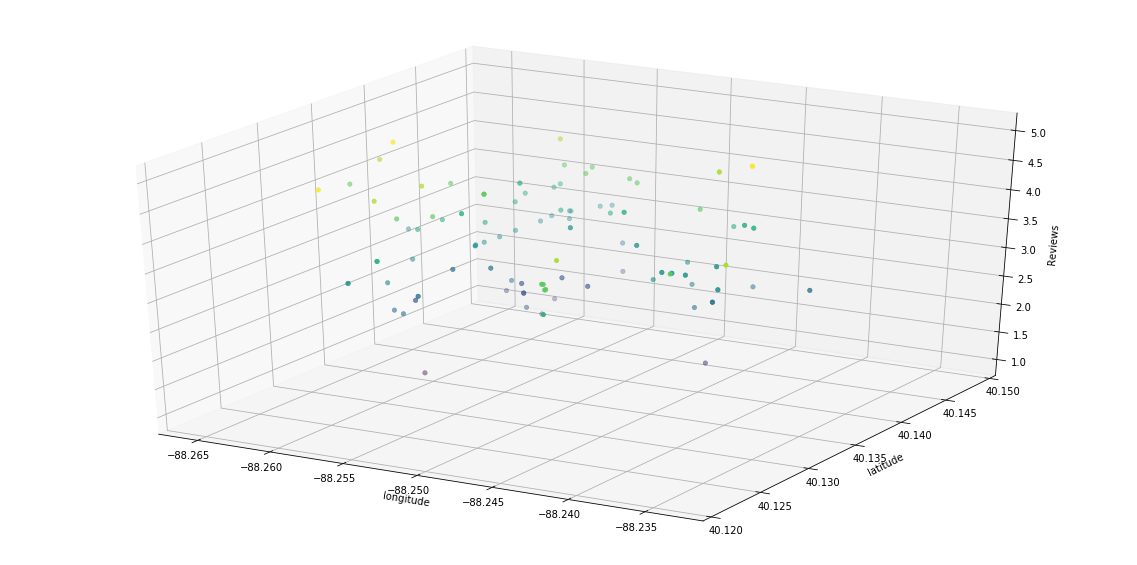

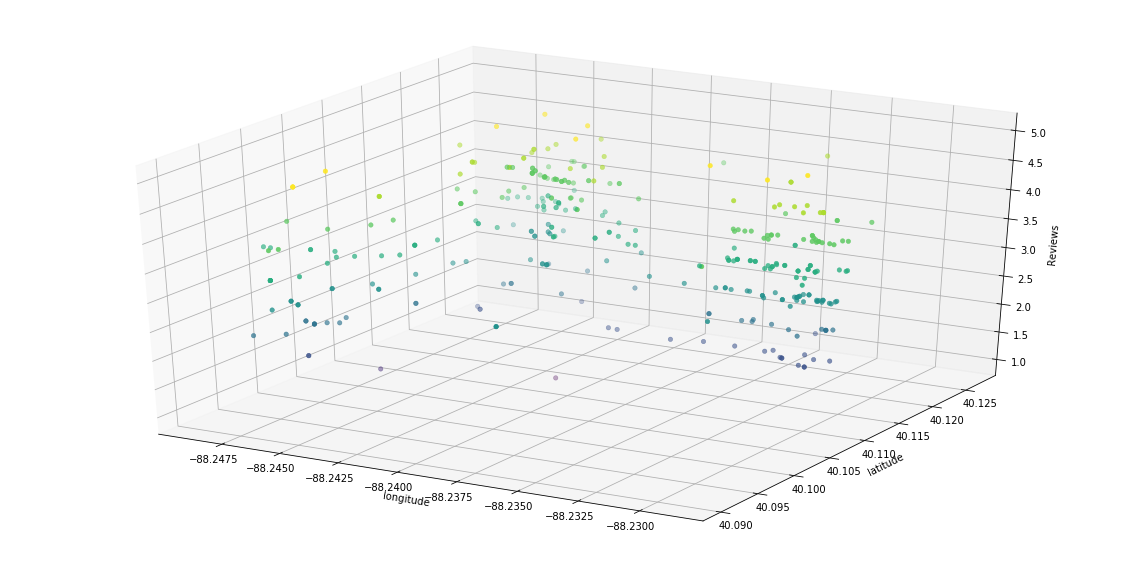

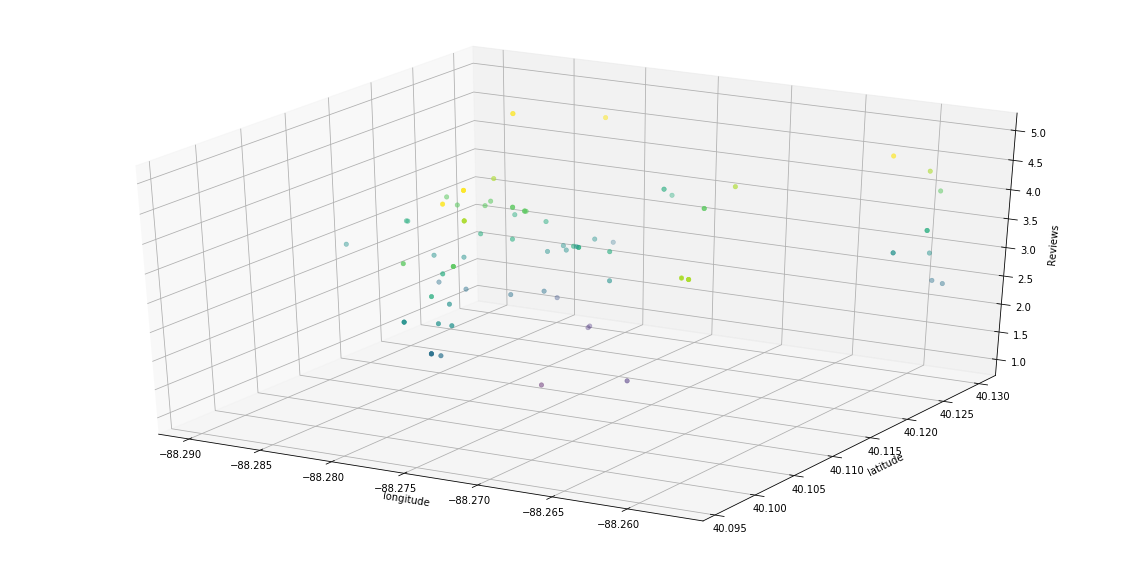

In [14]:
for i in range(0,3):
            fig = plt.figure(figsize=(20,10))
            ax = plt.axes(projection='3d') 
            x = df[((latitude[i]-0.02) < df['latitude']) &  ((latitude[i]+0.02) > df['latitude']) & ((longitude[i]-0.02) < df['longitude'])& ((longitude[i]+0.02) > df['longitude'])]['latitude']
            y = df[((latitude[i]-0.02) < df['latitude']) &  ((latitude[i]+0.02) > df['latitude']) & ((longitude[i]-0.02) < df['longitude'])& ((longitude[i]+0.02) > df['longitude'])]['longitude']
            z = df[((latitude[i]-0.02) < df['latitude']) &  ((latitude[i]+0.02) > df['latitude']) & ((longitude[i]-0.02) < df['longitude'])& ((longitude[i]+0.02) > df['longitude'])]['stars']
            ax.set_xlabel("longitude")
            ax.set_ylabel("latitude")        
            ax.set_zlabel("Reviews")
            ax.scatter(y,x,z, c=z, cmap='viridis',linewidth=0.5)

In [16]:
import pandas as pd
import sqlite3 as sql
from pandas.core.frame import DataFrame
% matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns 
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split 

# Question 2 What types of restaurants are most popular and where?

**The question contains there major parts.**
- What type of restaurants are most popular？
- Where are the most popular places for restaurants in Champaign?
- Can we predict the rating of different types of restaurants?

## 2.1What type of restaurants are most popular？

### 2.1.1Evaluate porpularity by the mean stars
The users of 'yelp' app rate the restaurants by stars. Thus, the mean stars of each type of restaurants can be used to evaluate the popularity 

To simplify, select only 'id', 'name' and the 'category'

In [17]:
query = '''select b.id,
                  b.name,
                  b.stars,
                  c.category           
                  
           from business as b
           left join category as c
             on b.id = c.business_id
    
           where b.city in ("Champaign")
           '''

with sql.connect('/home/data_scientist/accy571/readonly/data/yelp.db') as con:
    df = pd.read_sql(query, con)
    

Obtain all the restaurant type

In [18]:
dfr = df[df.category == 'Restaurants']
Restaurants_name =  dfr.name.unique().tolist()
Restaurants_type_ = []

for i in Restaurants_name:
    dfi = df[df.name == i]
    b = dfi.category.unique().tolist()
    for type_ in b:
        Restaurants_type_.append(type_) 

In [19]:
Restaurants_type = list(set(Restaurants_type_ ))  

Calcualte the mean 'stars' for each type of restaurants

In [20]:
# Transform the target column into float 
df[['stars']] = df[['stars']].astype(float)
Restaurants_stars_mean = []
for i in Restaurants_type:
    dfi_ = df[df.category == i]
    Restaurants_stars_mean.append(dfi_['stars'].mean())

The following table of the overall statistic description of the mean stars suggests that the means stars of the restaurants in Champaign range from 2/5 to 5/5, the mean rating for all the restaurants is 3.6/5, which is a fair rating.

In [21]:
df_Restaurants_stars_mean = DataFrame(Restaurants_stars_mean,columns = ['Restaurants_mean_stars'])
df_Restaurants_type = DataFrame(Restaurants_type, columns = ['Restaurants_type'])
df_type_meanstars = pd.concat([df_Restaurants_type, df_Restaurants_stars_mean], axis = 1)
df_type_meanstars.describe()

,Restaurants_mean_stars
count,132.000000
mean,3.604125
std,0.558182
min,2.000000
25%,3.250000
50%,3.558442
75%,3.835227
max,5.000000


As there are a great number of restaurant type and some types only contain 1 or 2 restaurants, we filtered the data and keep those types with more than 10 restaurants. As a result, we got the following 24 types, their mean stars and the number of restaurants under each category.

In [22]:
count_ = []
for i in Restaurants_type:
    count_.append(Restaurants_type_.count(i))

In [23]:
# Combine restaurants type, their mean stars and the number of restaurants into one dataframe.
df_count = DataFrame(count_,columns = ['type_count'])
df_type = pd.concat([df_type_meanstars, df_count], axis = 1)
df_type = df_type[df_type.type_count>10]
df_type = df_type.reset_index()

In [24]:
df_type

,index,Restaurants_type,Restaurants_mean_stars,type_count
0,1,Restaurants,3.308201,331
1,14,Sandwiches,3.148936,31
2,20,Food,3.731293,54
3,22,Specialty Food,4.195652,12
4,23,Nightlife,3.421687,53
5,29,Korean,3.500000,14
6,31,Burgers,2.756757,28
7,33,Pizza,3.282609,39
8,37,Asian Fusion,3.472222,18
9,41,Italian,3.307692,23


To visualize the mean stars, we involved a histogram to show the frequency of each mean stars. The plot indicates that the rating of around 3.2 has the greatest frequency and the mean values of the most types of restaurants are in the range from 3.0 to 3.9.

/opt/conda/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


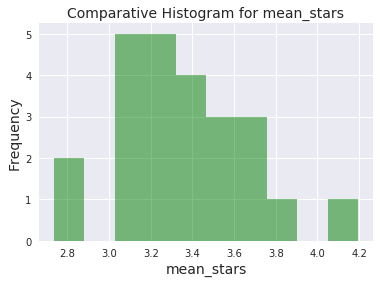

In [25]:
fig, ax = plt.subplots()
ax.hist(df_type['Restaurants_mean_stars'], alpha = .5, color = "green")
ax.set_xlabel('mean_stars', fontsize=14)
ax.set_ylabel('Frequency', fontsize=14)
ax.set_title('Comparative Histogram for mean_stars', fontsize=14)

The plot shows the mean stars for each type. We can see that the 'Speciality food' category has the highest stars. As the 23 types are all subcategories under 'Restaurants', the mean value of 'Restaurants' suggests a mean value for all the restaurants. Thus we highlight the 'Restaurants' and make a straight line for the value to see what kinds of restaurants have means stars greater than the mean rating in Champaign

In [26]:
# define x equals to the mean value of the 'Restaurants' category
dfR = df_type[df_type.Restaurants_type == 'Restaurants']
x = float(dfR['Restaurants_mean_stars'])

/opt/conda/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


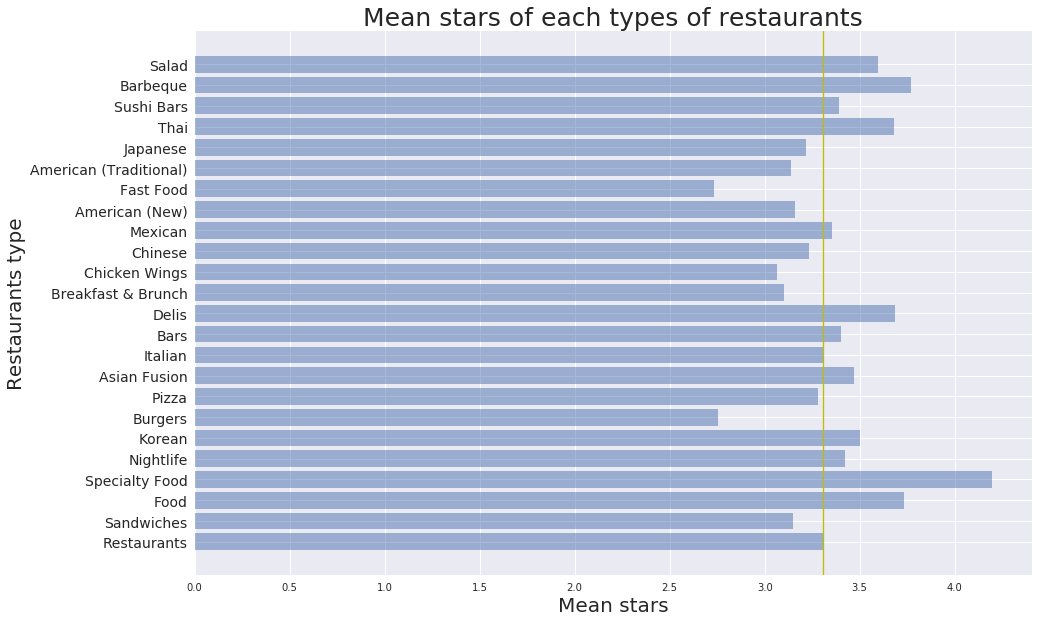

In [28]:
objects = df_type['Restaurants_type'].tolist()
y_pos = np.arange(len(objects))
performance = df_type['Restaurants_mean_stars'].tolist()


ax = plt.figure(figsize=(15,10)) 

ax = plt.barh(y_pos, performance, align='center', alpha=0.5)
ax = plt.yticks(y_pos, objects, fontsize=14)
ax = plt.xlabel('Mean stars', fontsize=20)
ax = plt.ylabel('Restaurants type', fontsize=20)
ax = plt.title('Mean stars of each types of restaurants', fontsize=25 )
plt.axvspan(x-0.003, x+0.003, color='y')


We select those types with mean stars higher than 3.2 and got the following list of types. These are the most popular types of restaurants based on the mean stars.

In [29]:
df_max_meanstars = df_type[df_type.Restaurants_mean_stars > 3.2]
c = df_max_meanstars['Restaurants_type'].tolist()
c

['Restaurants',
 'Food',
 'Specialty Food',
 'Nightlife',
 'Korean',
 'Pizza',
 'Asian Fusion',
 'Italian',
 'Bars',
 'Delis',
 'Chinese',
 'Mexican',
 'Japanese',
 'Thai',
 'Sushi Bars',
 'Barbeque',
 'Salad']

### 1.1.2 How does your city compare to other major cities or nearby towns?(Mean stars)

Compare with Peoria

In [30]:
query = '''select b.id,
                  b.name,
                  b.stars,
                  c.category           
                  
           from business as b
           left join category as c
             on b.id = c.business_id
    
           where b.city in ("Peoria")
           '''

with sql.connect('/home/data_scientist/accy571/readonly/data/yelp.db') as con:
    U_df = pd.read_sql(query, con)
    

In [31]:
U_dfr = U_df[U_df.category == 'Restaurants']
U_Restaurants_name =  U_dfr.name.unique().tolist()
U_Restaurants_type_ = []

for i in U_Restaurants_name:
    U_dfi = U_df[U_df.name == i]
    U_b = U_dfi.category.unique().tolist()
    for type_ in U_b:
        U_Restaurants_type_.append(type_) 
        

In [32]:
U_Restaurants_type = list(set(U_Restaurants_type_ ))  


In [33]:
# Transform the target column into float 
U_df[['stars']] = U_df[['stars']].astype(float)
U_Restaurants_stars_mean = []
for i in U_Restaurants_type:
    U_dfi_ = U_df[U_df.category == i]
    U_Restaurants_stars_mean.append(U_dfi_['stars'].mean())
    

Compared with Chanmaign, the city of Peorio has less types restaurants but the restaurants there has greater ratings suggested by the '75%' and the mean stars.

In [34]:
U_df_Restaurants_stars_mean = DataFrame(U_Restaurants_stars_mean,columns = ['U_Restaurants_mean_stars'])
U_df_Restaurants_type = DataFrame(U_Restaurants_type, columns = ['U_Restaurants_type'])
U_df_type_meanstars = pd.concat([U_df_Restaurants_type, U_df_Restaurants_stars_mean], axis = 1)
U_df_type_meanstars.describe()

,U_Restaurants_mean_stars
count,99.000000
mean,3.625969
std,0.561224
min,2.000000
25%,3.302736
50%,3.500000
75%,3.933036
max,5.000000


As what we did in the previous part, we select the types in Peorio which contains more than 10 restaurants and got 20 types.

In [35]:
U_count_ = []
for i in U_Restaurants_type:
    U_count_.append(U_Restaurants_type_.count(i))
    

In [36]:
U_df_count = DataFrame(U_count_,columns = ['U_type_count'])
U_df_type = pd.concat([U_df_type_meanstars, U_df_count], axis = 1)
U_df_type = U_df_type[U_df_type.U_type_count>10]
U_df_type.reset_index(drop=True, inplace=True)


**Find the most popular types of restaurants in Peorio. **   
The types which enjoy higher ratings in Peorio are different with those in Chmapign. However, the types of 'Japanese', 'Salad', 'Sushi Bars', 'Italian' , 'Pizzas', 'Nightlife', 'Delis' and 'bars' are popular in both cities. 'Specialty Food', which has the highest mean stars in Champaign, is not that popular in Peoria.

In [37]:
U_df_max = U_df_type[U_df_type.U_Restaurants_mean_stars > 3.4]
U_df_max['U_Restaurants_type'].tolist()


['Event Planning & Services',
 'Food',
 'Nightlife',
 'Seafood',
 'Pizza',
 'Italian',
 'Bars',
 'Breakfast & Brunch',
 'American (New)',
 'Japanese',
 'Caterers',
 'Sushi Bars']

We draw the histogram for the frequency of mean stars for both cities in one graph

/opt/conda/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


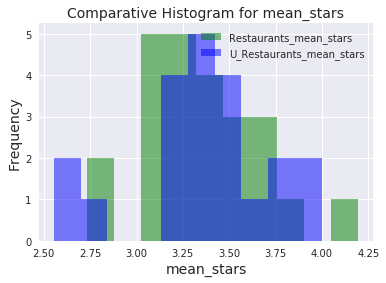

In [38]:
fig, ax = plt.subplots()
ax.hist(df_type['Restaurants_mean_stars'], alpha = .5, color = "green")
ax.hist(U_df_type['U_Restaurants_mean_stars'], alpha = .5, color = "b")

ax.set_xlabel('mean_stars', fontsize=14)
ax.set_ylabel('Frequency', fontsize=14)
ax.set_title('Comparative Histogram for mean_stars', fontsize=14)
ax.legend(loc='upper right')


In [39]:
# find the common types of restaurants in both cities
a = U_df_type['U_Restaurants_type'].tolist()
b = df_type['Restaurants_type'].tolist()
tmp = [val for val in a if val in b] 
# Grab the mean stars for the types of restaurants in both cities
# First Champaign
Compare_Re_name = []
for i in tmp:
    df_type_Com = df_type[df_type.Restaurants_type == i]
    Compare_Re_name.append(df_type_Com['Restaurants_mean_stars'].mean())
# Then Peorio
U_Compare_Re_name = []
for i in tmp:
    U_df_type_Com = U_df_type[U_df_type.U_Restaurants_type == i]
    U_Compare_Re_name.append(U_df_type_Com['U_Restaurants_mean_stars'].mean())
    
df_Compare_name = DataFrame(tmp,columns = ['Restaurants type'])
df_Compare_Re_name = DataFrame(Compare_Re_name,columns = ['Mean stars in Champaign'])
U_df_Compare_Re_name = DataFrame(U_Compare_Re_name,columns = ['Mean stars in Urbana'])

df_type_Compare = pd.concat([df_Compare_name, df_Compare_Re_name,U_df_Compare_Re_name], axis = 1)
df_type_Compare.head()

,Restaurants type,Mean stars in Champaign,Mean stars in Urbana
0,Restaurants,3.308201,3.305471
1,Sandwiches,3.148936,3.238636
2,Food,3.731293,3.527027
3,Nightlife,3.421687,3.411290
4,Burgers,2.756757,2.822581


In the following graph. the blue bars stands for 'Champaign' and the green bars stands for 'Peoria'. It indicates that for most categories, the restaurants in Peoria have higher mean stars. The types which are more obvious more popular by mean stars in Champaign are 'Chicken Wings', 'Fast Food' and 'Mexican'  

/opt/conda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "
/opt/conda/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


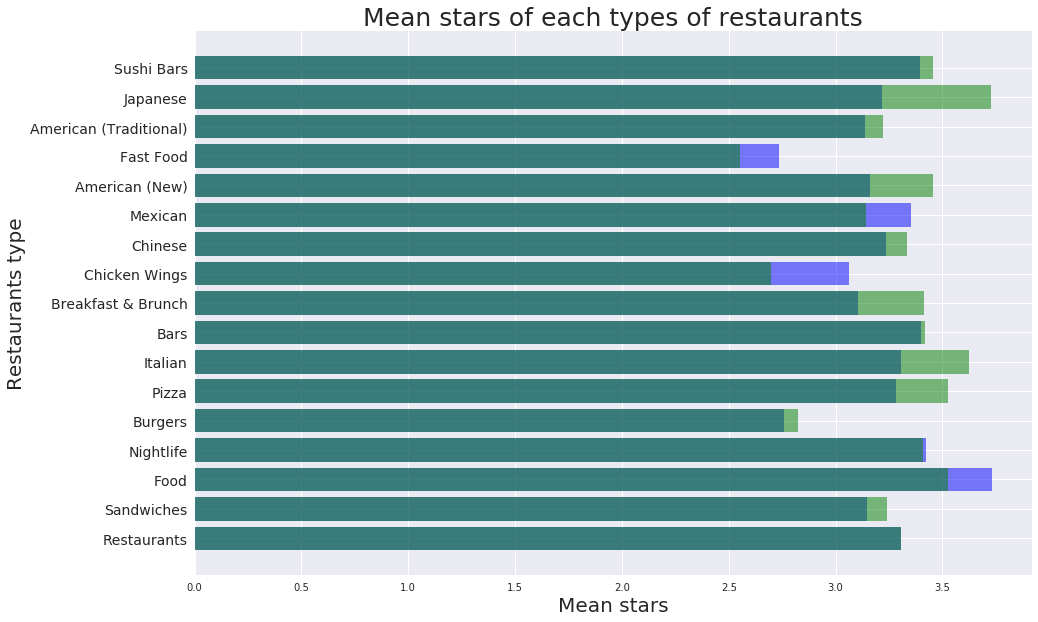

In [40]:
objects = tmp
y_pos = np.arange(len(objects))
performance1 = Compare_Re_name
performance2 = U_Compare_Re_name


ax = plt.figure(figsize=(15,10)) 


ax = plt.barh(y_pos, performance1, align='center', alpha=0.5, color = 'b')
ax = plt.barh(y_pos, performance2, align='center', alpha=0.5, color = 'g')


ax = plt.yticks(y_pos, objects, fontsize=14)
ax = plt.xlabel('Mean stars', fontsize=20)
ax = plt.ylabel('Restaurants type', fontsize=20)
ax = plt.title('Mean stars of each types of restaurants', fontsize=25 )

ax = plt.legend(loc='upper right')



### 2.1.3 Evaluate porpularity by the review count

Evaluate popularity only by mean stars is not rigorous as some restaurants only have few reviews so their 'stars' is not fair to evaluate popularity consider the situation that the 'stars' might be rated by some insiders. Consequently, we add another feature to evaluate the 'popularity', **that is review_count.** Review_count stands for how many. reviews a restaurant has on Yelp, the more a restaurant has, the greater mumber of people have been to the restaurant and which has a positive correlation to the popularity of the restaurant.     

*We choose to add the values in review_count of the restaurants in the same category rather than divding it by the number of restaurant under that category because we though the number of restaurants in a city can also somehow suggests the popularity of that type.*

In [41]:
query = '''select b.id,
                  b.name,
                  b.review_count,
                  c.category
           from business as b
           left join user as u
             on b.id = u.id
           left join category as c
           on b.id = c.business_id
           where b.city in ("Champaign")
           '''

with sql.connect('/home/data_scientist/accy571/readonly/data/yelp.db') as con:
    R_df = pd.read_sql(query, con)
    

In [42]:
R_dfr = R_df[R_df.category == 'Restaurants']
R_Restaurants_name =  R_dfr.name.unique().tolist()
R_Restaurants_type_ = []

for i in R_Restaurants_name:
    R_dfi = R_df[R_df.name == i]
    b = R_dfi.category.unique().tolist()
    for type_ in b:
        R_Restaurants_type_.append(type_) 
        

In [43]:
R_Restaurants_type = list(set(R_Restaurants_type_ ))  


In [44]:
R_df[['review_count']] = R_df[['review_count']].astype(float)


In [45]:
Restaurants_total_review = []
for i in R_Restaurants_type:
    R_dfi_ = R_df[R_df.category == i]
    Restaurants_total_review.append(R_dfi_['review_count'].sum())
    

In [46]:
df_Restaurants_total_review = DataFrame(Restaurants_total_review,columns = ['Restaurants_number_of_reviews'])
df_R_Restaurants_type = DataFrame(R_Restaurants_type, columns = ['Restaurants_type'])
df_type_totalreviews = pd.concat([df_R_Restaurants_type, df_Restaurants_total_review], axis = 1)
#df_type_totalreviews = df_type_totalreviews.drop(114)
df_type_totalreviews['Restaurants_number_of_reviews'].describe()


count      132.000000
mean       598.583333
std       1564.794921
min          3.000000
25%         76.750000
50%        196.500000
75%        520.750000
max      16274.000000
Name: Restaurants_number_of_reviews, dtype: float64

We chose the types of restaurants with relatively high review_count and got 24 types.

In [47]:
df_type_reviews = df_type_totalreviews[df_type_totalreviews.Restaurants_number_of_reviews>700]
df_type_reviews = df_type_reviews[df_type_reviews.Restaurants_number_of_reviews<16270]

df_type_reviews.reset_index(drop=True, inplace=True)

df_type_reviews


,Restaurants_type,Restaurants_number_of_reviews
0,Ice Cream & Frozen Yogurt,709.0
1,Event Planning & Services,1306.0
2,Sandwiches,1488.0
3,Food,4589.0
4,Nightlife,4077.0
5,Burgers,1204.0
6,Lounges,912.0
7,Pizza,1868.0
8,Asian Fusion,1077.0
9,Italian,1137.0


The histogram shows that the majority types we selected have review_count in a range of 700 to 2200. We also noticed that there was a blank between 2200 and 3800. A few types has an extremely great review count for about 4000 to 4500.

/opt/conda/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


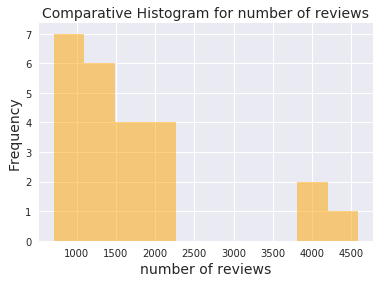

In [48]:
fig, ax = plt.subplots()
ax.hist(df_type_reviews['Restaurants_number_of_reviews'], alpha = .5, color = "orange")
ax.set_xlabel('number of reviews', fontsize=14)
ax.set_ylabel('Frequency', fontsize=14)
ax.set_title('Comparative Histogram for number of reviews', fontsize=14)


We let go 'food' as it is a big and vouge category. We can see from the bar plot below that the types such as 'Nightlifes','Bars', 'Pizzas', 'American(tradistional)', 'American(New)', 'Mexican' and 'Breakfast and Brunch' have the most reviews on Yelp. Recall that those types are also evaluated to be popular based on mean stars.

/opt/conda/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


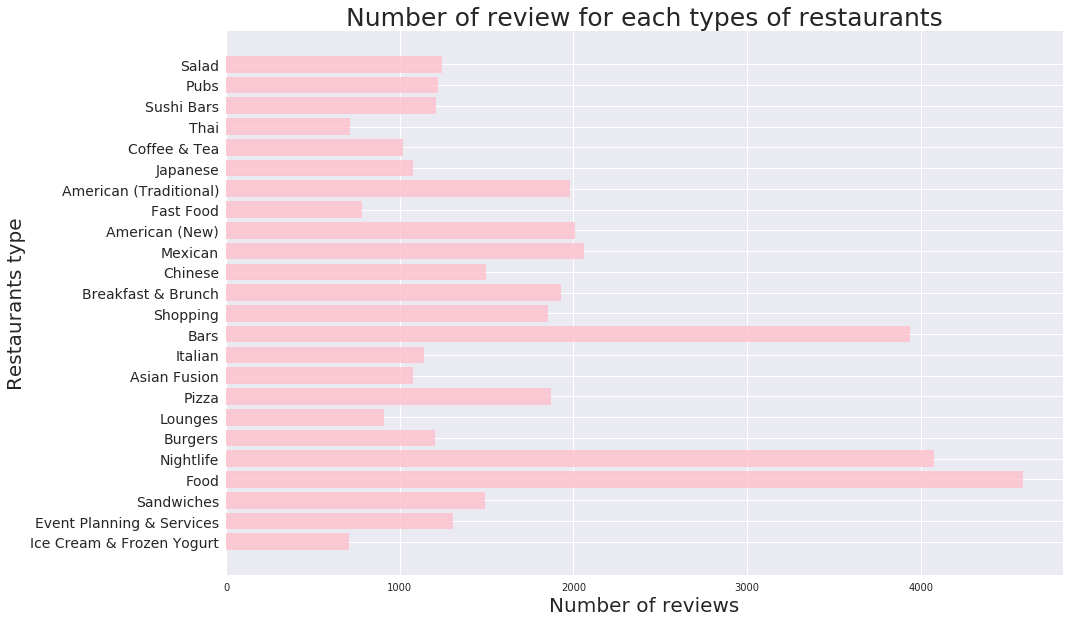

In [49]:
objects = df_type_reviews['Restaurants_type'].tolist()
y_pos = np.arange(len(objects))
performance = df_type_reviews['Restaurants_number_of_reviews'].tolist()


ax = plt.figure(figsize=(15,10)) 

ax = plt.barh(y_pos, performance, align='center', alpha=0.8, color = 'pink')
ax = plt.yticks(y_pos, objects, fontsize=14)
ax = plt.xlabel('Number of reviews', fontsize=20)
ax = plt.ylabel('Restaurants type', fontsize=20)
ax = plt.title('Number of review for each types of restaurants', fontsize=25 )



The most popular types of restaurants evaluated by review_count.

In [50]:
df_max_reviews = df_type_reviews[df_type_reviews.Restaurants_number_of_reviews > 1300]
d = df_max_reviews['Restaurants_type'].tolist()
d


['Event Planning & Services',
 'Sandwiches',
 'Food',
 'Nightlife',
 'Pizza',
 'Bars',
 'Shopping',
 'Breakfast & Brunch',
 'Chinese',
 'Mexican',
 'American (New)',
 'American (Traditional)']

####  Conclusion:
The following types of restaurants are outstanding both in the mean ratings and the number of reviews.     
Thus, these kinds of restaurants are of the most popular in Champaign, we let go 'food' category and concluded that **'Bars', 'Mexican', 'Pizza', 'Nightlife' and 'Chinese' **are most popular types in Champaign


In [51]:
common_type = [val for val in c if val in d] 
common_type


['Food', 'Nightlife', 'Pizza', 'Bars', 'Chinese', 'Mexican']

### 2.1.4How does your city compare to other major cities or nearby towns?(Review_count)

In [52]:
query = '''select b.id,
                  b.name,
                  b.review_count,
                  c.category
           from business as b
           left join user as u
             on b.id = u.id
           left join category as c
           on b.id = c.business_id
           where b.city in ("Peoria")
           '''

with sql.connect('/home/data_scientist/accy571/readonly/data/yelp.db') as con:
    P_df = pd.read_sql(query, con)
    

In [53]:
P_dfr = P_df[P_df.category == 'Restaurants']
P_Restaurants_name =  P_dfr.name.unique().tolist()
P_Restaurants_type_ = []

for i in P_Restaurants_name:
    P_dfi = P_df[P_df.name == i]
    P_b = P_dfi.category.unique().tolist()
    for type_ in P_b:
        P_Restaurants_type_.append(type_) 
        

In [54]:
P_Restaurants_type = list(set(P_Restaurants_type_ ))  

In [55]:
P_df[['review_count']] = P_df[['review_count']].astype(float)

In [56]:
P_Restaurants_total_review = []
for i in P_Restaurants_type:
    P_R_dfi_ = P_df[P_df.category == i]
    P_Restaurants_total_review.append(P_R_dfi_['review_count'].sum())

In [57]:
P_df_Restaurants_total_review = DataFrame(P_Restaurants_total_review,columns = ['P_Restaurants_number_of_reviews'])
P_df_R_Restaurants_type = DataFrame(P_Restaurants_type, columns = ['P_Restaurants_type'])
P_df_type_totalreviews = pd.concat([P_df_R_Restaurants_type, P_df_Restaurants_total_review], axis = 1)
#df_type_totalreviews = df_type_totalreviews.drop(114)
P_df_type_totalreviews['P_Restaurants_number_of_reviews'].describe()


count       99.000000
mean       978.222222
std       2187.148463
min          3.000000
25%        110.000000
50%        326.000000
75%        980.500000
max      19507.000000
Name: P_Restaurants_number_of_reviews, dtype: float64

We filtered the data and kept those type with more than 700 reviews and got 30 types.

In [58]:
P_df_type_reviews = P_df_type_totalreviews[P_df_type_totalreviews.P_Restaurants_number_of_reviews>700]
P_df_type_reviews = P_df_type_reviews[P_df_type_reviews.P_Restaurants_number_of_reviews<19500]

P_df_type_reviews.reset_index(drop=True, inplace=True)

P_df_type_reviews

,P_Restaurants_type,P_Restaurants_number_of_reviews
0,Arts & Entertainment,922.0
1,Event Planning & Services,2004.0
2,Sandwiches,1772.0
3,Food,5244.0
4,Nightlife,4759.0
5,Seafood,1662.0
6,Active Life,1553.0
7,Burgers,1667.0
8,Pizza,3291.0
9,Italian,2050.0


To compared the review_count for both cities, we first found the common types 

In [59]:
e = df_type_reviews['Restaurants_type'].tolist()
f = P_df_type_reviews['P_Restaurants_type'].tolist()
tmp1 = [val for val in e if val in f] 
tmp1

['Event Planning & Services',
 'Sandwiches',
 'Food',
 'Nightlife',
 'Burgers',
 'Pizza',
 'Italian',
 'Bars',
 'Shopping',
 'Breakfast & Brunch',
 'Chinese',
 'Mexican',
 'American (New)',
 'Fast Food',
 'American (Traditional)',
 'Japanese',
 'Coffee & Tea',
 'Sushi Bars',
 'Pubs',
 'Salad']

From the *Comparative Histogram for number of reviews* below, we found that compared to the restaurants in Champaign, the restaurants in Peoria have more extreme number of reviews, either as low as 1000 to 2000, or has high as 4000 to 4500.

/opt/conda/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


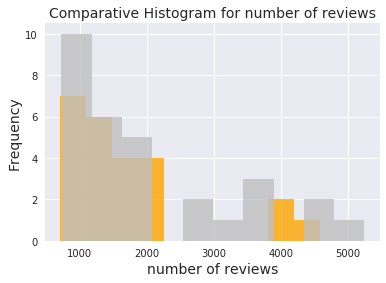

In [60]:
fig, ax = plt.subplots()
ax.hist(df_type_reviews['Restaurants_number_of_reviews'], alpha = .8, color = "orange")
ax.hist(P_df_type_reviews['P_Restaurants_number_of_reviews'], alpha = .8, color = "silver")
ax.set_xlabel('number of reviews', fontsize=14)
ax.set_ylabel('Frequency', fontsize=14)
ax.set_title('Comparative Histogram for number of reviews', fontsize=14)

In [61]:
df_type_reviews['Restaurants_type']

0     Ice Cream & Frozen Yogurt
1     Event Planning & Services
2                    Sandwiches
3                          Food
4                     Nightlife
5                       Burgers
6                       Lounges
7                         Pizza
8                  Asian Fusion
9                       Italian
10                         Bars
11                     Shopping
12           Breakfast & Brunch
13                      Chinese
14                      Mexican
15               American (New)
16                    Fast Food
17       American (Traditional)
18                     Japanese
19                 Coffee & Tea
20                         Thai
21                   Sushi Bars
22                         Pubs
23                        Salad
Name: Restaurants_type, dtype: object

In [62]:
# find the common types of restaurants in both cities
e = df_type_reviews['Restaurants_type'].tolist()
f = P_df_type_reviews['P_Restaurants_type'].tolist()
tmp1 = [val for val in e if val in f] 
# Grab the number of reviews for the types of restaurants in both cities
# First Champaign
Compare_review_name = []
for i in tmp1:
    df_type_Com = df_type_reviews[df_type_reviews.Restaurants_type == i]
    Compare_review_name.append(df_type_Com['Restaurants_number_of_reviews'].mean())
# Then Urbana
P_Compare_review_name = []
for i in tmp1:
    P_df_type_Com = P_df_type_reviews[P_df_type_reviews.P_Restaurants_type == i]
    P_Compare_review_name.append(P_df_type_Com['P_Restaurants_number_of_reviews'].mean())
    
df_CompareR_name = DataFrame(tmp1,columns = ['Restaurants type'])
df_Compare_review_name = DataFrame(Compare_review_name, columns = ['Number of reviews in Champaign'])
df_P_Compare_review_name = DataFrame(P_Compare_review_name,columns = ['Number of reviews in Peoria'])

df_type_Compare_review = pd.concat([df_CompareR_name, df_Compare_review_name, df_P_Compare_review_name], axis = 1)
df_type_Compare_review

,Restaurants type,Number of reviews in Champaign,Number of reviews in Peoria
0,Event Planning & Services,1306.0,2004.0
1,Sandwiches,1488.0,1772.0
2,Food,4589.0,5244.0
3,Nightlife,4077.0,4759.0
4,Burgers,1204.0,1667.0
5,Pizza,1868.0,3291.0
6,Italian,1137.0,2050.0
7,Bars,3935.0,4505.0
8,Shopping,1852.0,2929.0
9,Breakfast & Brunch,1926.0,1308.0


/opt/conda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "
/opt/conda/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


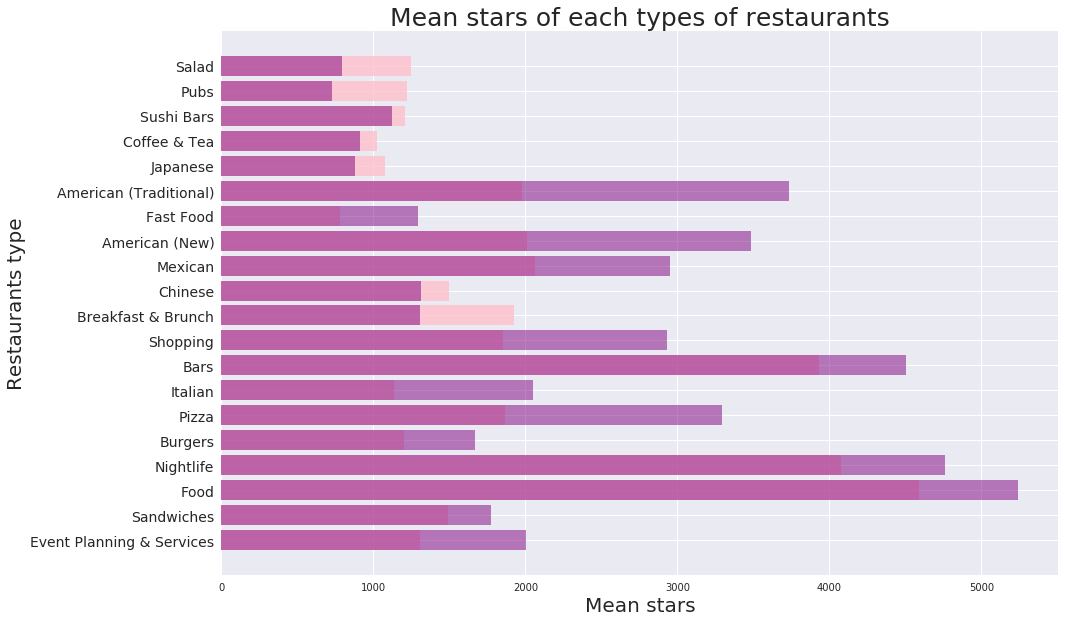

In [63]:
objects = tmp1
y_pos = np.arange(len(objects))
performance3 = Compare_review_name
performance4 = P_Compare_review_name


ax = plt.figure(figsize=(15,10)) 


ax = plt.barh(y_pos, performance3, align='center', alpha=0.8, color = 'pink')
ax = plt.barh(y_pos, performance4, align='center', alpha=0.5, color = 'purple')


ax = plt.yticks(y_pos, objects, fontsize=14)
ax = plt.xlabel('Mean stars', fontsize=20)
ax = plt.ylabel('Restaurants type', fontsize=20)
ax = plt.title('Mean stars of each types of restaurants', fontsize=25 )

ax = plt.legend(loc='upper right')


## 2.2Where are the most popular places for restaurants in Champaign?

To analyze the quesstion, we use the features 'longitude' and 'latitude'.

In [64]:
query = '''select b.id,
                  b.name,
                  b.longitude,
                  b.latitude,
                  c.category
           from business as b
           left join category as c
           on b.id = c.business_id
           where b.city in ("Champaign")
           and c.category = 'Restaurants'
           '''

with sql.connect('/home/data_scientist/accy571/readonly/data/yelp.db') as con:
    W_df = pd.read_sql(query, con)

In [65]:
W_df.head()

,id,name,longitude,latitude,category
0,-2q4dnUw0gGJniGW2aPamQ,Fiesta Ranchera,-88.2458,40.0941,Restaurants
1,-A4suUjxa7gNaiUMDjO42g,Farmhouse Restaurant At Harvest Market,-88.2459,40.0903,Restaurants
2,-fiUXzkxRfbHY9TKWwuptw,DESTIHL Restaurant & Brew Works,-88.2443,40.119,Restaurants
3,-hliqBp7tq7Z5XLaTLAXAg,Taffies Restaurant,-88.2772,40.1145,Restaurants
4,-Jhlh8Scjy669NdtCfKSSg,V Picasso,-88.2432,40.1172,Restaurants


We draw a scatter plot to show what places in Champaign have the most number of restaurants. We can clearly see three areas, which are Green street, Champaign downtown and the area around Market Place

/opt/conda/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


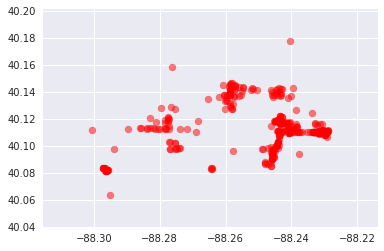

In [66]:
fig, ax = plt.subplots()

x = np.array(W_df['longitude'].tolist())
y = np.array(W_df['latitude'].tolist())

plt.scatter(x, y, c='r', alpha=0.5)
plt.show()


## 2.3 Machine learning

In answering to the question 'Can we predict the rating of different types of restaurants?', we used some regressors to do machine learing.    
Features and labels selection:
- We involved 'longitude', 'latitude', 'review_count' and 'category' as features as we though they are the most relevant to the rating of a restaurants.
- We used the column 'stars' as labels.


In [67]:
query = '''select b.id,
                  b.name,
                  b.longitude,
                  b.latitude,
                  b.review_count,
                  c.category,
                  b.stars
                  
           from business as b
           left join category as c
             on b.id = c.business_id
           
           where b.city in ("Champaign")
             and b.name in (select distinct b.name
                            from business as b
                            left join category as c
                              on b.id = c.business_id
                            where b.city in ("Champaign")
                              and c.category = 'Restaurants')
           '''

with sql.connect('/home/data_scientist/accy571/readonly/data/yelp.db') as con:
    dfML = pd.read_sql(query, con)
    dfML = dfML[dfML["category"] != 'Restaurants']

### 2.3.1 Data preparation

Normalize the numberial columns

In [68]:
dfML[['stars']] = dfML[['stars']].astype(float)

ss = preprocessing.StandardScaler()
longitude = ss.fit_transform(dfML['longitude'].astype(float))
latitude = ss.fit_transform(dfML['latitude'].astype(float))
review_count = ss.fit_transform(dfML['review_count'].astype(float))
latitude = ss.fit_transform(dfML['latitude'].astype(float))

dfML['longitude'] = longitude
dfML['latitude'] = latitude
dfML['review_count'] = review_count

/opt/conda/lib/python3.6/site-packages/sklearn/preprocessing/data.py:586: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/preprocessing/data.py:649: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/preprocessing/data.py:586: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.re

Encode the categorical column

In [69]:
LE = preprocessing.LabelEncoder()
a = LE.fit_transform(dfML['category'])

dfML['category'] = a

Split the data into tests and trains

In [70]:
label = dfML[['stars']]
features = dfML[['longitude','latitude', 'review_count','category']]

X_train, X_test, y_train, y_test \
= train_test_split(features, label, test_size= 0.25, random_state = 0)

### 2.3.2   KNeighborsRegressor 

By using the KNeighborsRegressor, we got a low accuracy score of 5.6%, so we tried other regressor to see if they could do better.

accuracy = 5.6 %.


/opt/conda/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


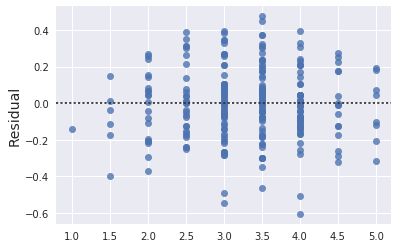

In [71]:
from sklearn.neighbors import KNeighborsRegressor as KNR
KNN = KNR(n_neighbors = 40)
KNN.fit(X_train, y_train)
    
prediction_KNN = KNN.predict(X_test)

score = KNN.score(X_test, y_test)
print("accuracy = {0:3.1f} %.".format(100.0 * score))

ax_KNN = sns.residplot(y_test, prediction_KNN,)
ax_KNN.set_ylabel("Residual", fontsize=14)

### 2.3.3  RandomForestRegressor

By using the RandomForestRegressor, we got a relatively high score of 55.8% as majority of restaurants have 3-4 stars.

accuracy = 55.8 %.


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


/opt/conda/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


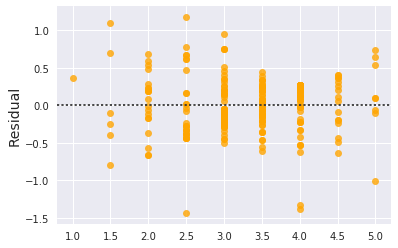

In [72]:
from sklearn.ensemble import RandomForestRegressor as RFR
rfr = RFR(random_state=0)
rfr.fit(X_train, y_train)
    
prediction_rfr = rfr.predict(X_test)

score = rfr.score(X_test, y_test)
print("accuracy = {0:3.1f} %.".format(100.0 * score))

ax_rfr = sns.residplot(y_test, prediction_rfr, color = 'orange')
ax_rfr.set_ylabel("Residual", fontsize=14)

# Question 3:  Is the restaurant selection diverse or homogenous? 


In order to properly answer this we have broken this section into three (3) sub-questions that will conclusively lead us to our answer: 

(1) Are there a lot or a few types of restaurants?, 

(2) Have the types of restaurants been changing over time?, and 

(3) Is there a demand for more types of food?.

We first start by choosing the features in the Yelp! data that will help answer our sub-questions. By doing this, it will reduce the size of our data making it easier to work with and will ultimately allow our data to run faster.

In [73]:
# Example query to pull reviews for all businesses in Champaign-Urbana
query = '''select b.*,
                  c.category,
                  r.*
           from business as b
           left join category as c
             on b.id = c.business_id
           left join review as r
             on b.id = r.business_id
           where b.city in ("Champaign")
           '''

with sql.connect('/home/data_scientist/accy571/readonly/data/yelp.db') as con:
    data = pd.read_sql(query, con)

In [76]:
# choose columns in dataset
data1 = data[['name', 'stars', 'review_count', 'category', 'date']]
data1


,name,stars,stars,review_count,category,date
0,Beaumont Tire & Auto Repair,4.5,5,16,Auto Repair,2012-10-06 00:00:00
1,Beaumont Tire & Auto Repair,4.5,5,16,Auto Repair,2016-02-26 00:00:00
2,Beaumont Tire & Auto Repair,4.5,5,16,Auto Repair,2015-08-12 00:00:00
3,Beaumont Tire & Auto Repair,4.5,5,16,Auto Repair,2015-09-16 00:00:00
4,Beaumont Tire & Auto Repair,4.5,1,16,Auto Repair,2016-09-27 00:00:00
5,Beaumont Tire & Auto Repair,4.5,4,16,Auto Repair,2014-09-24 00:00:00
6,Beaumont Tire & Auto Repair,4.5,5,16,Auto Repair,2015-05-25 00:00:00
7,Beaumont Tire & Auto Repair,4.5,5,16,Auto Repair,2016-08-29 00:00:00
8,Beaumont Tire & Auto Repair,4.5,5,16,Auto Repair,2016-08-02 00:00:00
9,Beaumont Tire & Auto Repair,4.5,5,16,Auto Repair,2017-01-04 00:00:00


### (1) Are there a lot or a few types of restaurants?

From the dataset we created in the code cell above, we describe the data to tell us how many total reviews are in the dataset (i.e. count), the number of restaurants (i.e. unique), the restaurant with the most reviews (i.e. top), and how many reviews the top restaurant has (i.e. freq). These statistics will help in answering

In [77]:
data1['name'].describe()

count                               97630
unique                               1008
top       DESTIHL Restaurant & Brew Works
freq                                 2688
Name: name, dtype: object

Based on the descriptive statistics calculated from the code cell above, we can see that there are a total of 16,279 reviews from 331 different restaurants in Champaign. Because of these results, we believe that there is a wide-range of restaurants and that there are, in fact, a lot of types of restaurants located in Champaign. Next, we proceed in answering sub-question (2).


### (2) Have the types of restaurants been changing over time?
For visualization purposes we chose to look at the changes in the types of restaurants in the past four (4) years (beginning in 2013 until 2017). First, we manipulate our data into showing the results (i.e. Yelp! reviews) for each period.  Next, we look to see which five (5) restaurants received the most reviews (by using Counter from the Collections library) per year. As you will see, we chose to base our visualizations on the number of reviews for each period. Finally, we compare the visualizations for each year to conclude whether or not the types of restaurants have been changing over time.

In [82]:
# choose years 2013 - 2017 (4 years)

date2013 = (data1['date'] > '2013-01-01 00') & (data1['date'] <= '2013-12-31 00')
data2013 = data1.loc[date2013]

date2014 = (data1['date'] > '2014-01-01 00') & (data1['date'] <= '2014-12-31 00')
data2014 = data1.loc[date2014]

date2015 = (data1['date'] > '2015-01-01 00') & (data1['date'] <= '2015-12-31 00')
data2015 = data1.loc[date2015]

date2016 = (data1['date'] > '2016-01-01 00') & (data1['date'] <= '2016-12-31 00')
data2016 = data1.loc[date2016]

date2017 = (data1['date'] > '2017-01-01 00') & (data1['date'] <= '2017-12-31 00')
data2017 = data1.loc[date2017]


In [83]:
date2013_2 = (data1['date'] > '2013-01-01 00') & (data1['date'] <= '2014-12-31 00')
data2013_2 = data1.loc[date2013_2]

date2014_2 = (data1['date'] > '2014-01-01 00') & (data1['date'] <= '2015-12-31 00')
data2014_2 = data1.loc[date2014_2]

date2015_2 = (data1['date'] > '2015-01-01 00') & (data1['date'] <= '2016-12-31 00')
data2015_2 = data1.loc[date2015_2]

date2016_2 = (data1['date'] > '2016-01-01 00') & (data1['date'] <= '2017-12-31 00')
data2016_2 = data1.loc[date2016_2]

all_years = (data1['date'] > '2013-01-01 00') & (data1['date'] <= '2017-12-31 00')
all_years = data1.loc[all_years]



#### Years: 2013 to 2014


In [84]:
# list restaurant names that occur the most in year 2013
from collections import Counter

Counter(data2013['name']).most_common(5)


[('Big Grove Tavern', 376),
 ('DESTIHL Restaurant & Brew Works', 246),
 ('Seven Saints', 154),
 ('Radio Maria', 144),
 ('Maize Mexican Grill', 140)]

For year 2013, _Bangkok Thai and Pho 911_, _Papa Del's Pizza_, _Maize Mexican Grill_, _DESTIHL Restaurant & Brew Works_, and _Bombay Indian Grill_ were reviewed the most amount of times. 



In [85]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

import scipy.stats as stats
import pylab
from scipy.stats import norm
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import confusion_matrix
from sklearn.feature_selection import VarianceThreshold
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from datetime import datetime as dt


In [87]:
% matplotlib inline

data1['date'] = pd.to_datetime(data1['date'], coerce=True)


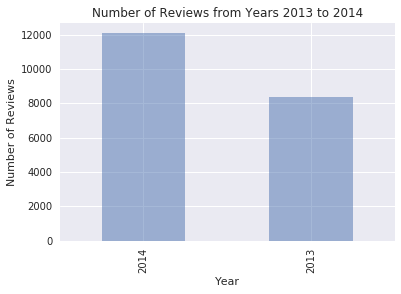

In [88]:
data2013_2['year'] = data2013_2['date'].dt.year
data2013_2['year'].value_counts().plot(kind='bar', alpha=0.5)
pylab.title('Number of Reviews from Years 2013 to 2014')
pylab.xlabel('Year')
pylab.ylabel('Number of Reviews')



The above graph shows that the number of reviews from 2013 to 2014 have increased by a little more than 500 reviews.  Assuming that the reviews are made by consumers who are first-time visitors of restaurants, we believe this increase means that people visited more restaurants that they haven’t visited in the prior year (i.e. 2013).



#### Years: 2014 to 2015


In [89]:
# list restaurant names that occur the most in year 2014

Counter(data2014['name']).most_common(5)


[('DESTIHL Restaurant & Brew Works', 426),
 ('Big Grove Tavern', 376),
 ('Seven Saints', 231),
 ('Radio Maria', 186),
 ('Sakanaya Restaurant', 174)]

For year 2014, _Maize Mexican Grill_, _Cabo's Cantina and Grill_, _Orange & Brew_, _DESTIHL Restaurant & Brew Works_, and _Bacaro_ were reviewed the most amount of times.


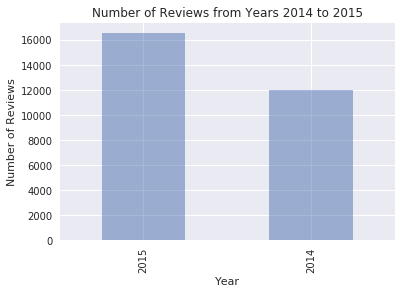

In [90]:
data2014_2['year'] = data2014_2['date'].dt.year
data2014_2['year'].value_counts().plot(kind='bar', alpha=0.5)
pylab.title('Number of Reviews from Years 2014 to 2015')
pylab.xlabel('Year')
pylab.ylabel('Number of Reviews')

The above graph shows that the number of reviews from 2014 to 2015 have increased by just about 1,000 reviews.  



#### Years: 2015 to 2016


In [91]:
# list restaurant names that occur the most in year 2015

Counter(data2015['name']).most_common(5)


[('DESTIHL Restaurant & Brew Works', 570),
 ('Big Grove Tavern', 472),
 ('V Picasso', 429),
 ('Seven Saints', 413),
 ('Miga', 407)]

For year 2015, _Sakanaya Restaurant_, _DESTIHL Restaurant & Brew Works_, _Radio Maria_, _Maize Mexican Grill_, and _Big Grove Tavern_ were reviewed the most amount of times. 


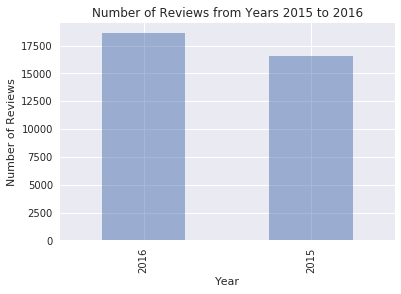

In [92]:
data2015_2['year'] = data2015_2['date'].dt.year
data2015_2['year'].value_counts().plot(kind='bar', alpha=0.5)
pylab.title('Number of Reviews from Years 2015 to 2016')
pylab.xlabel('Year')
pylab.ylabel('Number of Reviews')


The above graph shows that the number of reviews from 2015 to 2016 have increased slightly by about 200 reviews.  Assuming that the reviews are made by consumers who are first-time visitors of restaurants, we believe this slight increase means that consumers are not visiting new restaurants as much as they have in the prior years.



#### Years: 2016 to 2017


In [93]:
# list restaurant names that occur the most in year 2016

Counter(data2016['name']).most_common(5)


[('DESTIHL Restaurant & Brew Works', 540),
 ('Miga', 528),
 ('Big Grove Tavern', 464),
 ('Seven Saints', 371),
 ('Black Dog Smoke & Ale House', 360)]

For year 2016, _Black Dog Smoke & Ale House_, _Sakanaya Restaurant_, _Nando Milano Trattoria_, _Maize Mexican Grill_, and _DESTIHL Restaurant & Brew Works_ were reviewed the most amount of times. 


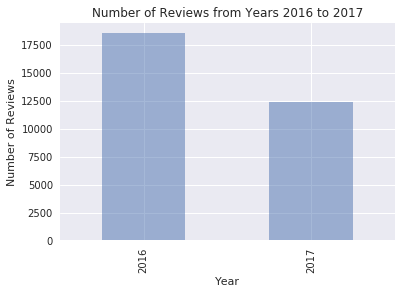

In [94]:
data2016_2['year'] = data2016_2['date'].dt.year
data2016_2['year'].value_counts().plot(kind='bar', alpha=0.5)
pylab.title('Number of Reviews from Years 2016 to 2017')
pylab.xlabel('Year')
pylab.ylabel('Number of Reviews')


The above graph shows that the number of reviews from 2016 to 2017 have decreased drastically by over 2,000 reviews.  We believe this decrease means that people are either not visiting new restaurants or they are visiting new restaurants that they haven’t visited before but just aren’t reviewing them.


#### Years: 2013 to 2017


In [95]:
# list restaurant names that occur the most in year 2017

Counter(data2017['name']).most_common(5)


[("Hamilton Walker's", 544),
 ("Scotty's Brewhouse", 459),
 ('DESTIHL Restaurant & Brew Works', 378),
 ('Miga', 308),
 ("Portillo's", 270)]

 For year 2017, _Hamilton Walker's_, _Kohinoor Indian Restaurant and Lounge_, _Sakanaya Restaurant_, _Ozu Ramen_, and _Scotty's Brewhouse_ were reviewed the most amount of times. 


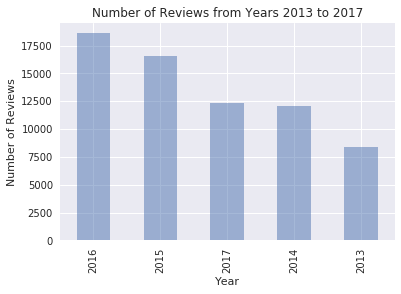

In [96]:
all_years['year'] = all_years['date'].dt.year
all_years['year'].value_counts().plot(kind='bar', alpha=0.5)
pylab.title('Number of Reviews from Years 2013 to 2017')
pylab.xlabel('Year')
pylab.ylabel('Number of Reviews')


The above graph shows that the number of reviews from 2013 to 2017 as a whole.  As you can see, each year has increased in the number of reviews except for year 2017, which had just about the same amount of reviews as year 2014.  As we previously mentioned, we believe this could be due to the fact that consumers are either not going to new restaurants, or they are visiting new restaurants and just not reviewing them.  Below is a graph of the number of reviews each year from 2004, when Yelp! was created up until 2017.


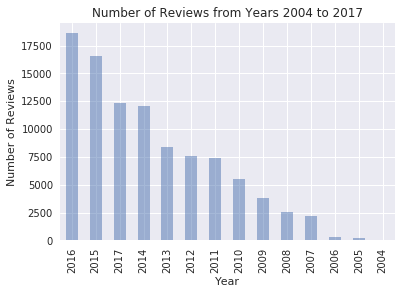

In [97]:
data1['year'] = data1['date'].dt.year
data1['year'].value_counts().plot(kind='bar', alpha=0.5)
pylab.title('Number of Reviews from Years 2004 to 2017')
pylab.xlabel('Year')
pylab.ylabel('Number of Reviews')


Assuming the number of reviews indicates the popularity of visiting, you can see from the statistical analyses provided by the Counter module, just about the same types of restaurants were visited. Not until just recently in 2017 have people been visiting different types of restaurants than in prior years.  

For example, years 2012, 2013, 2014, and 2016 consistently include _Maize Mexican Grill_ and _DESTIHL Restaurant & Brew Works_.  Whereas in year 2017, neither of these two restaurants were included in the most rated restaurants.  One possible reason why these two restaurants were not included in the most rated restaurants in year 2017 could be because the people who have already reviewed these restaurants do not feel the need to review them again, but are still visiting. 

Overall, we conclude that the _types_ of restaurants have not changed much between 2013 and 2016, however, it seems that people are beginning to visit different restaurants in 2017. Furthermore, the number of reviews have increased from year to year, until just recently in 2017.

Next, we proceed in answering sub-question (3).


### (3) Is there a demand for more types of food?
Based on the results from the graphs produced in the above code cells, since 2017 is the only year that people reviewed different restaurants than prior years, we believe it is safe to assume that people are starting to visit restaurants that they haven't visited before. Because of this assumption, we believe that people are beginning to demand more types of foods.



# Analysis of Question 2:


From the analyses shown above, we believe there are a lot of types of restaurants as there are a total of 331 different restaurants in this database.  According to the past four years, the types of restaurants have not seemed to be changing up until just recently in 2017 where people are beginning to visit different types of restaurants.  Lastly, because people are just now (i.e. in 2017) beginning to visit different types of restaurants, we believe that there is starting to become a demand for more types of foods.  

Overall, the restaurant selection in Champaign is way more diverse than homogenous.  By answering the above questions (in the previous paragraph) it gives us a better understanding of the habits of consumers within the past four years and how these habits are in the current year.  This will ultimately allow us to better predict what consumers’ eating habits 


In [ ]:
query = '''select b.*,
                  c.category,
                  r.*
           from business as b
           left join category as c
             on b.id = c.business_id
           left join review as r
             on b.id = r.business_id
           where b.city in ("Champaign")
           '''

with sql.connect('/home/data_scientist/accy571/readonly/data/yelp.db') as con:
    data = pd.read_sql(query, con)

# Question 4: Does the dates matter?
For the open-ended question, our group chose to analyze the data based on dates. We believe the time of people choosing to go out and have a meal will truly reflect their eating habits.
For this question, we take different approaches while we are analyzing the data:
Weekday vs. Weekend
How does weather impact on the numbers?
What is the trend of the data changing over years?

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: the coerce=True keyword is deprecated, use errors='coerce' instead
  This is separate from the ipykernel package so we can avoid doing imports until


/opt/conda/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


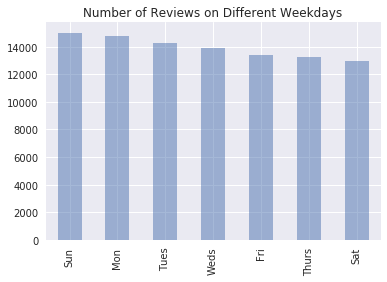

In [75]:
import pylab
% matplotlib inline
data['Date'] = pd.to_datetime(data['date'], coerce=True)
data['weekday'] = data['Date'].dt.dayofweek

days = {0:'Mon',1:'Tues',2:'Weds',3:'Thurs',4:'Fri',5:'Sat',6:'Sun'}

data['weekday'] = data['weekday'].apply(lambda x: days[x])

data['weekday'].value_counts().plot(kind = 'bar', alpha = 0.5)
pylab.title('Number of Reviews on Different Weekdays')

## 1) Weekday vs. Weekend
First of all, we think about which day of the week would people choose to hang out the most and our prediction is that people would hang out mostly on weekends. From the graph, we observe that people go out most on Sunday, which is predictable. What surprise us is that the second highest is Monday and Saturday has the lowest frequency of people having meals outside. There is no major difference or preference of people choosing to go out on which day of the week. Our group believe that one possible reason for such high number of dining-out during the weekdays is because people do not have time to cook during the week while they are busy on working.

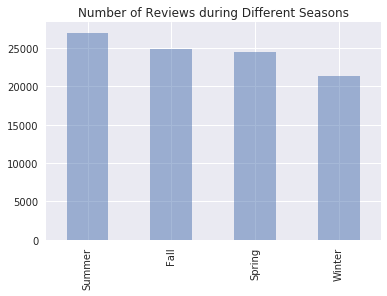

In [98]:
data['quarter'] = data['Date'].dt.quarter

quarter = {1:'Spring',2:'Summer',3:'Fall',4:'Winter'}

data['quarter'] = data['quarter'].apply(lambda x: quarter[x])
data['quarter'].value_counts().plot(kind = 'bar', alpha = 0.5)
pylab.title('Number of Reviews during Different Seasons')

## 2) How does weather impact on the numbers?
Then, we think that weather is also a major factor for people deciding whether to go out for a meal or not. Thus, we plot the graph based on quarters of the year and have the quarters refer to the four seasons. The plot is very close to what we assumed it should be looked like: people go out for meals mostly in the summer when the temperature is higher outside. During the winter time, people would choose to stay home and have meals in their warm houses.



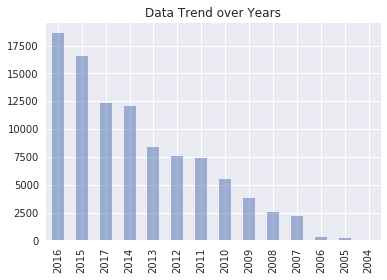

In [99]:
data['year'] = data['Date'].dt.year



data['year'].value_counts().plot(kind = 'bar', alpha = 0.5)
pylab.title('Data Trend over Years')

## 3) What is the trend of the data changing over years?
One thing to notice on the graph is that the data for 2017 is not the highest among the years. We believe the reason for that is the data for 2017 is still not updated to date and 2017 has not ended yet. With exception of 2017 data, the number of people using Yelp to reflect their eating habit is increasing over years. We can observe a big jump in data from 2014 and 2015 and the data amount is still in an increasing trend after 2015. 



# Analysis of Question 4:
  From taking three different approaches on analyzing the data based on dates. Our group believe that date does have an impact on people’s eating habit. The most obvious one is that people tend to go out more during the warm days, such as summertime. Therefore, restaurants could have more promotions and activities to attract customers during those days. The need for people having meals in a restaurant does not decrease a lot during working days comparing to weekends. Restaurants that have different menus for working days and weekends may promote their sales since the customers’ needs are different on the dates. 
   With an increasing trend of data of people visiting restaurants over the years, funding a restaurant will not be a bad idea. Generally, customer’s need and their willingness to go out for a meal differs on different dates of the year and analyzing the data based on dates would help us to have a better idea of the eating habits of these customers.  

